In [2]:
# plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib as mpl
# mpl.font_manager._rebuild()
# mpl.rcParams['font.sans-serif'] = ['xkcd-script']
# mpl.rcParams['font.fantasy'] = ['xkcd']
# mpl.rcParams['font.cursive'] = ['xkcd']

# for drawing scaled text 
import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties

def use_sans_maths():
    mpl.rcParams['text.usetex'] = True 
    mpl.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = 'cm'
    mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
       ]
    
# use_sans_maths()

In [3]:
def draw_rectangle(fig, ax, rect_x_start=0, rect_y_start=0, rect_width=20, rect_height=80,
                   rectangle_color='mediumslateblue'):
    
    rect = patches.Rectangle((rect_x_start, rect_y_start), rect_width, rect_height, 
                         linewidth=1, edgecolor='k', 
                         facecolor=rectangle_color)
    
    ax.add_patch(rect)
    
    return fig, ax 

In [4]:
def draw_scaled_text(fig, ax, x, y, xscale=1, yscale=1, text='text', rotate=None):
    
    if not ax: 
        ax=plt.gca()
    
    # fp = FontProperties(family="Helvetica")
    tp = TextPath((0, 0), text, size=1)  # prop=fp
    trans = mtrans.Affine2D().scale(xscale, yscale) + \
        mtrans.Affine2D().translate(x,y) + ax.transData
    
    if rotate is not None:
            trans = mtrans.Affine2D().scale(xscale, yscale).rotate_deg(rotate) + \
        mtrans.Affine2D().translate(x,y) + ax.transData 
    
    pp = PathPatch(tp, lw=0, fc="k", transform=trans)
    ax.add_artist(pp)
    
    return fig, ax

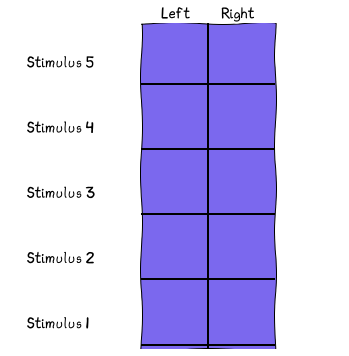

In [10]:
plt.xkcd()
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

rect_x_start = 0
rect_y_start = 0
rect_width = 20
rect_height = 80
rect_y_end = rect_y_start + rect_height
rect_x_end = rect_x_start + rect_width
rect = patches.Rectangle((rect_x_start, rect_y_start), rect_width, rect_height, 
                         linewidth=1, edgecolor='k', 
                         facecolor='mediumslateblue')
# rect vertical separation line 
ax.vlines(x=(rect_x_start + rect_width)/2, ymin=rect_y_start, 
           ymax=rect_y_start + rect_height)


ax.add_patch(rect)

# Choice
ax.text(s='Left', x=3, y=81)
ax.text(s='Right', x=12, y=81)

# Stimulus 
num_stimuli = 5
for stimuli, y_loc in zip(np.arange(1, num_stimuli+1), 
                          np.linspace(rect_y_start, rect_y_end, num_stimuli+1)):    
    ax.text(s='Stimulus ' + str(stimuli), x=rect_x_start - 17, y=y_loc+5)
    ax.hlines(y=y_loc+1, xmin=rect_x_start, xmax=rect_x_end)

ax.set_xlim([-20, 30])
ax.set_ylim([0, 80])

# ax.set_title('Experiment condition matrix')
plt.axis('off')

fig.savefig('condition_decision_matrix.png', dpi=300)

## input X matrix for dPCA

In [201]:
[6, 43, 107] * 1/255

TypeError: unsupported operand type(s) for /: 'list' and 'int'

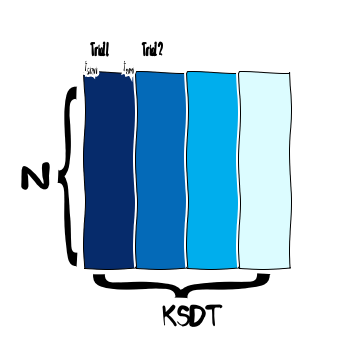

In [219]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)


colors = [np.array([6, 43, 107])/255,
         np.array([4,106,184])/255,
         np.array([0,174,237])/255,
         np.array([220,252,255])/255]

fig, ax = draw_rectangle(fig=fig, ax=ax, 
                         rect_x_start=0, rect_y_start=0, rect_width=20, rect_height=30,
                         rectangle_color=colors[0])

fig, ax = draw_rectangle(fig=fig, ax=ax, 
                         rect_x_start=20, rect_y_start=0, rect_width=20, rect_height=30,
                         rectangle_color=colors[1])

fig, ax = draw_rectangle(fig=fig, ax=ax, 
                         rect_x_start=40, rect_y_start=0, rect_width=20, rect_height=30,
                   rectangle_color=colors[2])

fig, ax = draw_rectangle(fig=fig, ax=ax, 
                         rect_x_start=60, rect_y_start=0, rect_width=20, rect_height=30,
                   rectangle_color=colors[3])

# curly bracket 

fig, ax = draw_scaled_text(fig=fig, ax=ax, x=-13, y=5, xscale=20, yscale=30, text=r'$\{$')
fig, ax = draw_scaled_text(fig=fig, ax=ax, x=-25, y=12, xscale=20, yscale=5, text=r'N')

fig, ax = draw_scaled_text(fig=fig, ax=ax, x=0, y=30, xscale=2.5, yscale=2.5, text=r'$t_\mathrm{start}$')
fig, ax = draw_scaled_text(fig=fig, ax=ax, x=15, y=30, xscale=2.5, yscale=2.5, text=r'$t_\mathrm{end}$')

fig, ax = draw_scaled_text(fig=fig, ax=ax, x=2.5, y=32.5, xscale=2.5, yscale=2.5, text=r'Trial 1')
fig, ax = draw_scaled_text(fig=fig, ax=ax, x=22.5, y=32.5, xscale=2.5, yscale=2.5, text=r'Trial 2')


fig, ax = draw_scaled_text(fig=fig, ax=ax, x=60, y=-6, xscale=10, yscale=75, text=r'$\{$',
                          rotate=90)

fig, ax = draw_scaled_text(fig=fig, ax=ax, x=30, y=-9, xscale=10, yscale=4, text=r'KSDT')


ax.set_xlim([-30, 100])
ax.set_ylim([-10, 40])

plt.axis('off')

fig.savefig('data_matrix.png', dpi=450)



## 3D data

In [119]:
# get 3D arrows in matplotlib 
# From here: https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

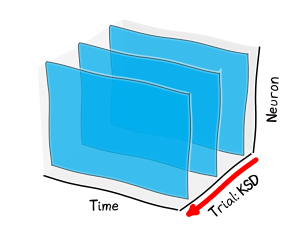

In [220]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d  # draw 2D shape in 3D
fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(5, 4)

rect_x_start = 0
rect_y_start = 10
rect_width = 100
rect_height= 100

rect_color =  np.array([0,174,237])/255


rect_1 = patches.Rectangle((rect_x_start, rect_y_start), rect_width, rect_height, 
                         linewidth=1, edgecolor='k', alpha=0.5,
                         facecolor=rect_color)

rect_2 = patches.Rectangle((rect_x_start, rect_y_start), rect_width, rect_height, 
                         linewidth=1, edgecolor='k', alpha=0.5,
                         facecolor=rect_color)

rect_3 = patches.Rectangle((rect_x_start, rect_y_start), rect_width, rect_height, 
                         linewidth=1, edgecolor='k', alpha=0.5,
                         facecolor=rect_color)


ax.set_xlim([-20, 80])
ax.set_zlim([-20, 85])
ax.set_ylim([10, 50])


ax.add_patch(rect_1)
ax.add_patch(rect_2)
ax.add_patch(rect_3)

art3d.pathpatch_2d_to_3d(rect_1, z=0, zdir="y")
art3d.pathpatch_2d_to_3d(rect_2, z=15, zdir="y")
art3d.pathpatch_2d_to_3d(rect_3, z=30, zdir="y")

# Add mean arrow 
arrow_x_start = 110
arrow_x_end = 110
arrow_y_start = 30
arrrow_y_end = -10
arrow_z_start = 10
arrow_z_end = 10

mean_arrow = Arrow3D([arrow_x_start, arrow_x_end], [arrow_y_start, arrrow_y_end], 
                [arrow_z_start, arrow_z_end], mutation_scale=20, 
                lw=5, arrowstyle="-|>", color="r")

ax.add_artist(mean_arrow)

remove_ticks = True
if remove_ticks:
    z_labelpad = -10
    x_labelpad = -10
    y_labelpad = -5
else:
    z_labelpad = None
    x_labelpad = None
    y_labelpad = None

# labels 
ax.set_zlabel('Neuron', labelpad=z_labelpad) # since ticks will be remove
ax.set_xlabel('Time', labelpad=x_labelpad)
ax.set_ylabel('Trial: KSD', labelpad=y_labelpad)

if remove_ticks:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])



fig.savefig('matrices_tiled_in_3D.png', dpi=300)

# Effor versus reward plot

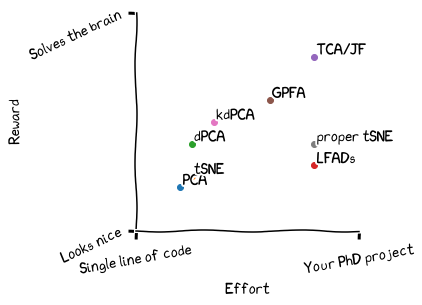

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)

dim_reduction_methods = {
    'PCA': [0.2, 0.2],
    'tSNE': [0.25, 0.25],
    'dPCA': [0.25, 0.4],  
    'LFADs': [0.8, 0.3],
    'TCA/JF': [0.8, 0.8],
    'GPFA': [0.6, 0.6],
    'kdPCA': [0.35, 0.5],
    'proper tSNE': [0.8, 0.4],
}



for dim_method, metric in dim_reduction_methods.items():
    ax.scatter(metric[0], metric[1])
    ax.annotate(dim_method, (metric[0] + 0.01, metric[1] + 0.01))
    
    
ax.set_ylabel('Reward')
ax.set_xlabel('Effort')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
    

ax.set_xticklabels([
    'Single line of code',
    'Your PhD project'],
rotation=10)

ax.set_yticklabels([
    'Looks nice',
    'Solves the brain',
], rotation=25)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# fig.tight_layout()

fig.savefig('dim_reduction_methods_prop.png', dpi=300, bbox_inches="tight")
